# **MAGIC Gamma Telescope** #

https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

## import modules and reading data ##

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as ss
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier


In [3]:
cols = ["fLength","fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans","fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data',names= cols)

## data ##

In [4]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [5]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [6]:
df["class"] = (df["class"] == 'g').astype(int)

In [7]:
df["class"].unique()

array([1, 0])

In [8]:
#here label is "class" and rest of the atributes are features

## visualization ##

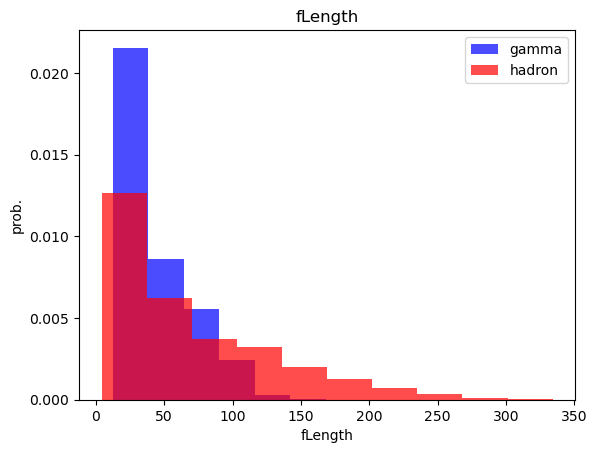

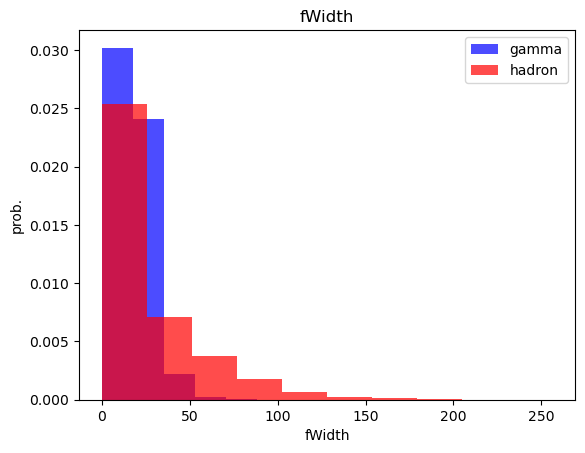

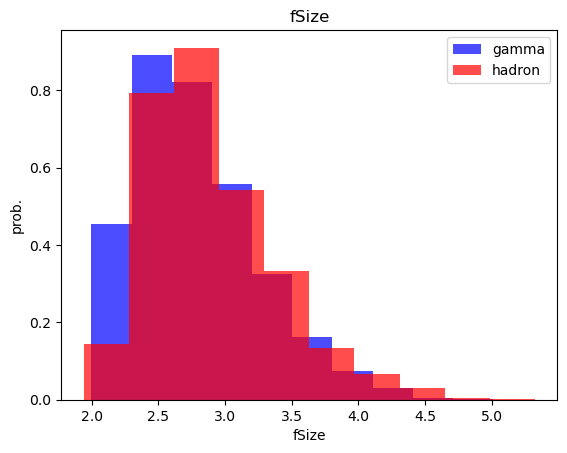

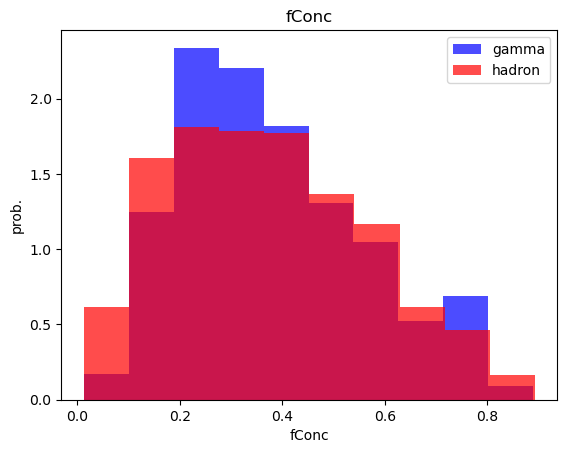

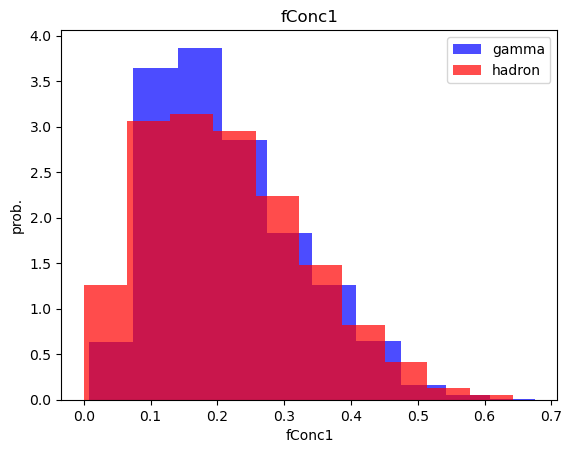

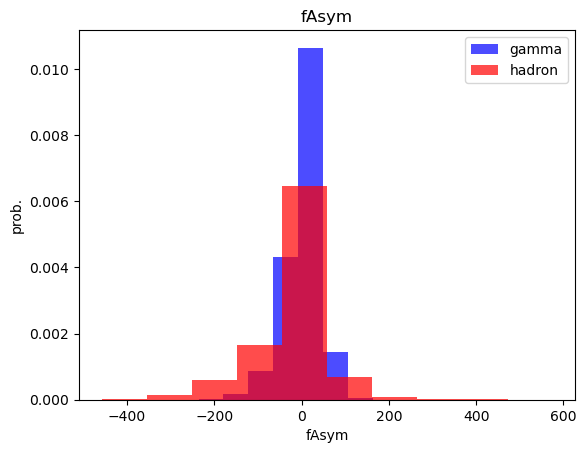

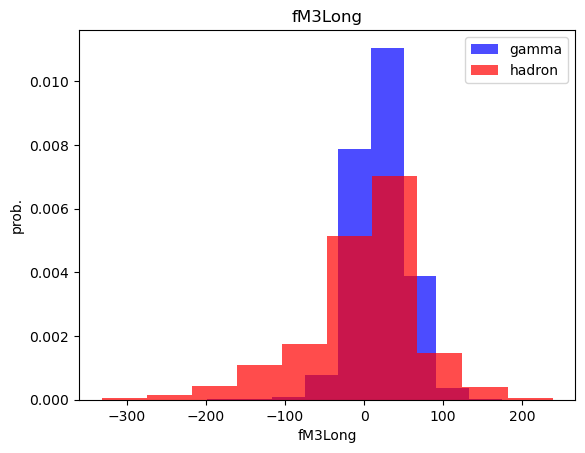

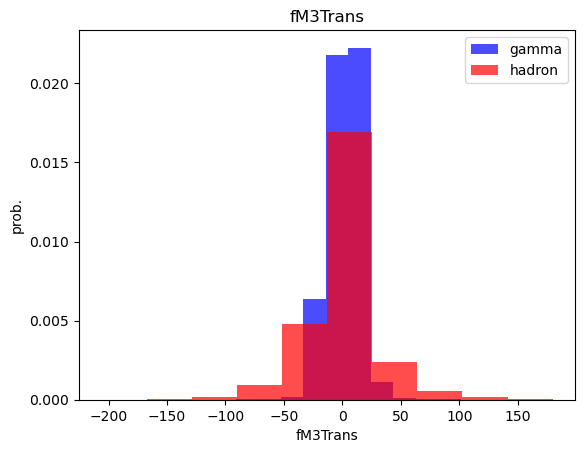

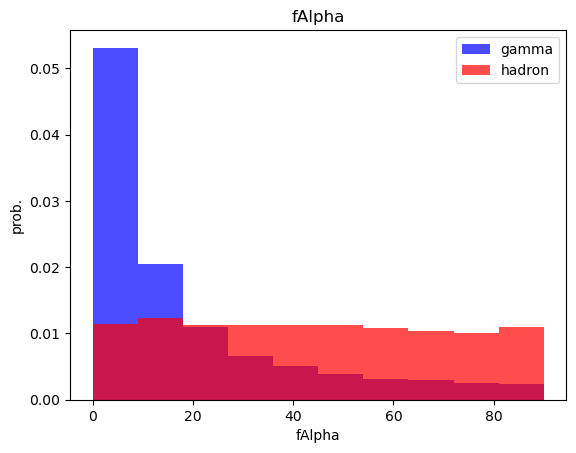

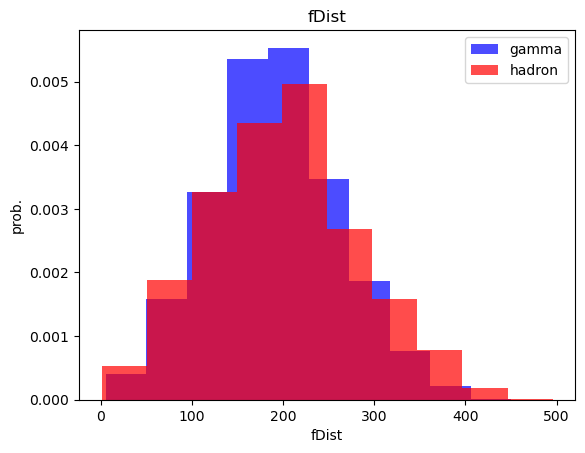

In [9]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label],color = 'blue', label='gamma',alpha = .7, density=True)
    plt.hist(df[df["class"] == 0][label], color = 'red', alpha = .7, label='hadron',density=True)
    plt.title(label)
    plt.ylabel("prob.")
    plt.xlabel(label)
    plt.legend()
    plt.show()

## preprocessing ##

In [10]:
train, valid, test = np.split(df.sample(frac=1), [int(len(df) * .6), int(len(df) * .8)])
#print(type(train),type(valid), type(test))

In [11]:
def preprocessing(dataframe, oversampling:bool):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    s = ss()
    x = s.fit_transform(x)  
    if oversampling:
       ros = RandomOverSampler() 
       x, y = ros.fit_resample(x,y)
    data = np.hstack((x,np.reshape(y, (len(y),1))))
    return data, x, y

In [12]:
train, x_train, y_train = preprocessing(dataframe=train, oversampling= True)
valid, x_valid, y_valid = preprocessing(dataframe=valid, oversampling= True)
train, x_test, y_test = preprocessing(dataframe=test, oversampling= True)

In [13]:
print(len(train),sum(y_train == 1),sum(y_train == 0 ))
print(len(valid),sum(y_valid == 1),sum(y_valid == 0 ))
print(len(test),sum(y_test == 1),sum(y_test == 0 ))

4920 7400 7400
4944 2472 2472
3804 2460 2460


## kNN ##


In [14]:
#so now we have train validation and test 

neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [15]:
y_pred = neigh.predict(x_test)
print(y_pred)
print(y_test)

[0 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      2460
           1       0.77      0.86      0.81      2460

    accuracy                           0.80      4920
   macro avg       0.81      0.80      0.80      4920
weighted avg       0.81      0.80      0.80      4920



## naive bayes ##

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
nb = GaussianNB()
model = nb.fit(x_train , y_train )
y_pred = model.predict(x_test)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.43      0.56      2460
           1       0.61      0.90      0.73      2460

    accuracy                           0.66      4920
   macro avg       0.71      0.66      0.64      4920
weighted avg       0.71      0.66      0.64      4920



## log regression ##

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg = LogisticRegression()
lg_model = lg.fit(x_train, y_train)

In [22]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      2460
           1       0.72      0.82      0.77      2460

    accuracy                           0.75      4920
   macro avg       0.76      0.75      0.75      4920
weighted avg       0.76      0.75      0.75      4920



## SVM (Support Vector Mechine) ##

In [23]:
from sklearn.svm import SVC


In [24]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [25]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      2460
           1       0.80      0.90      0.84      2460

    accuracy                           0.83      4920
   macro avg       0.84      0.83      0.83      4920
weighted avg       0.84      0.83      0.83      4920



## neural net ##

In [28]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


In [29]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)
  plt.legend()

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.legend()
  plt.show()

In [68]:
with tf.device('/GPU:0'):
    nn_model = tf.keras.Sequential(
            [
                tf.keras.layers.Dense(32, activation= 'relu', input_shape=(10,)),
                #tf.keras.layers.Dense(32, activation= 'relu'),
                
               
                tf.keras.layers.Dense(1, activation= 'sigmoid'),

            ]
        )
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss = 'binary_crossentropy', metrics=['accuracy'])

In [69]:
with tf.device('/GPU:0'):
    history = nn_model.fit(
       x_train,y_train,
       epochs=50, 
       batch_size=64, 
       validation_data=(x_valid, y_valid),
       

    )

Epoch 1/50
232/232 [==============================] - 4s 16ms/step - loss: 0.4344 - accuracy: 0.7961 - val_loss: 0.3804 - val_accuracy: 0.8388
Epoch 2/50
232/232 [==============================] - 4s 15ms/step - loss: 0.3724 - accuracy: 0.8355 - val_loss: 0.3621 - val_accuracy: 0.8430
Epoch 3/50
232/232 [==============================] - 4s 15ms/step - loss: 0.3571 - accuracy: 0.8446 - val_loss: 0.3579 - val_accuracy: 0.8386
Epoch 4/50
232/232 [==============================] - 4s 16ms/step - loss: 0.3498 - accuracy: 0.8486 - val_loss: 0.3585 - val_accuracy: 0.8345
Epoch 5/50
232/232 [==============================] - 4s 15ms/step - loss: 0.3461 - accuracy: 0.8486 - val_loss: 0.3500 - val_accuracy: 0.8400
Epoch 6/50
232/232 [==============================] - 4s 15ms/step - loss: 0.3459 - accuracy: 0.8489 - val_loss: 0.3537 - val_accuracy: 0.8418
Epoch 7/50
232/232 [==============================] - 4s 15ms/step - loss: 0.3430 - accuracy: 0.8495 - val_loss: 0.3458 - val_accuracy: 0.8447

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


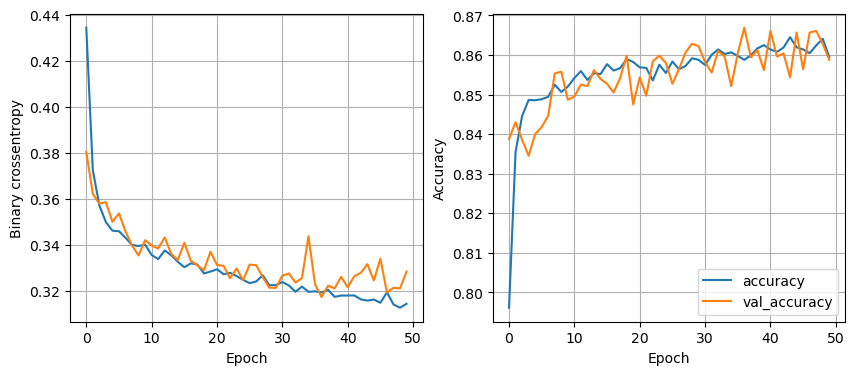

In [70]:
plot_history(history)

In [51]:
def train(lr, batch_size, nodes, e):
    with tf.device('/GPU:0'):
        nn_model = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(nodes, activation= 'relu', input_shape=(10,)),
            tf.keras.layers.Dense(nodes, activation= 'relu'),
            tf.keras.layers.Dense(1, activation= 'sigmoid'), # we have binary classification (0 and 1)

            ]
        )
        nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy', metrics=['accuracy'])

        history = nn_model.fit(
        x_train,y_train,
        batch_size=batch_size, 
        validation_data=(x_valid, y_valid),epochs = e

        )
        plot_history(history)

1 32 32 20
Epoch 1/20
463/463 [==============================] - 8s 17ms/step - loss: 2.5669 - accuracy: 0.5074 - val_loss: 0.7046 - val_accuracy: 0.5000
Epoch 2/20
463/463 [==============================] - 8s 16ms/step - loss: 0.7093 - accuracy: 0.5046 - val_loss: 0.7347 - val_accuracy: 0.5000
Epoch 3/20
463/463 [==============================] - 8s 16ms/step - loss: 0.7102 - accuracy: 0.5035 - val_loss: 0.7026 - val_accuracy: 0.5000
Epoch 4/20
463/463 [==============================] - 8s 17ms/step - loss: 0.7101 - accuracy: 0.4980 - val_loss: 0.8968 - val_accuracy: 0.5000
Epoch 5/20
463/463 [==============================] - 8s 17ms/step - loss: 0.7123 - accuracy: 0.4954 - val_loss: 0.7233 - val_accuracy: 0.5000
Epoch 6/20
463/463 [==============================] - 8s 17ms/step - loss: 0.7038 - accuracy: 0.5081 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 7/20
463/463 [==============================] - 8s 16ms/step - loss: 0.7075 - accuracy: 0.4984 - val_loss: 0.6941 - val_accur

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


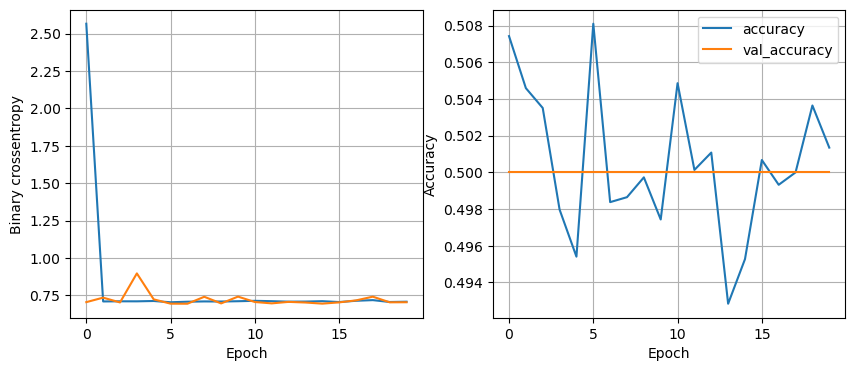

1 64 32 20
Epoch 1/20
232/232 [==============================] - 4s 16ms/step - loss: 4.1803 - accuracy: 0.5036 - val_loss: 0.7085 - val_accuracy: 0.5000
Epoch 2/20
232/232 [==============================] - 4s 17ms/step - loss: 0.7043 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
232/232 [==============================] - 4s 16ms/step - loss: 0.7045 - accuracy: 0.5041 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
232/232 [==============================] - 4s 16ms/step - loss: 0.6991 - accuracy: 0.4972 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 5/20
232/232 [==============================] - 4s 16ms/step - loss: 0.7027 - accuracy: 0.5005 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 6/20
232/232 [==============================] - 4s 16ms/step - loss: 0.7000 - accuracy: 0.5046 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 7/20
232/232 [==============================] - 4s 16ms/step - loss: 0.7092 - accuracy: 0.4999 - val_loss: 0.6957 - val_accur

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


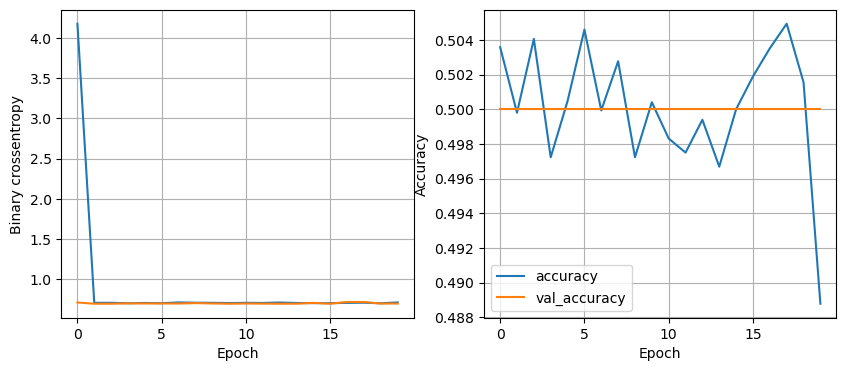

1 96 32 20
Epoch 1/20
155/155 [==============================] - 3s 16ms/step - loss: 9.0924 - accuracy: 0.5097 - val_loss: 0.6929 - val_accuracy: 0.4994
Epoch 2/20
155/155 [==============================] - 2s 16ms/step - loss: 0.6960 - accuracy: 0.4975 - val_loss: 0.6944 - val_accuracy: 0.4998
Epoch 3/20
155/155 [==============================] - 2s 16ms/step - loss: 0.6979 - accuracy: 0.5031 - val_loss: 0.7164 - val_accuracy: 0.5190
Epoch 4/20
155/155 [==============================] - 2s 16ms/step - loss: 0.6862 - accuracy: 0.5314 - val_loss: 0.6749 - val_accuracy: 0.5738
Epoch 5/20
155/155 [==============================] - 2s 16ms/step - loss: 0.6838 - accuracy: 0.5529 - val_loss: 0.6938 - val_accuracy: 0.5006
Epoch 6/20
155/155 [==============================] - 3s 17ms/step - loss: 0.6939 - accuracy: 0.5145 - val_loss: 0.6804 - val_accuracy: 0.5583
Epoch 7/20
155/155 [==============================] - 3s 19ms/step - loss: 0.6850 - accuracy: 0.5427 - val_loss: 0.6626 - val_accur

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


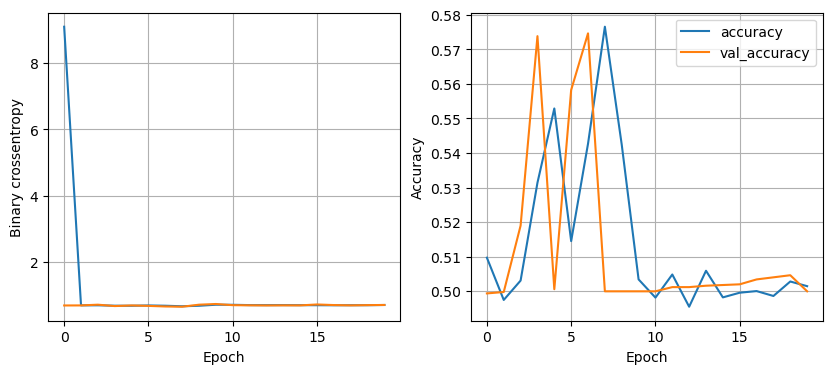

1 32 33 20
Epoch 1/20
463/463 [==============================] - 8s 16ms/step - loss: 2.4888 - accuracy: 0.5107 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 2/20
463/463 [==============================] - 7s 16ms/step - loss: 0.7098 - accuracy: 0.4985 - val_loss: 0.7485 - val_accuracy: 0.5000
Epoch 3/20
463/463 [==============================] - 8s 16ms/step - loss: 0.7120 - accuracy: 0.5030 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 4/20
463/463 [==============================] - 8s 17ms/step - loss: 0.7128 - accuracy: 0.4945 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 5/20
463/463 [==============================] - 8s 17ms/step - loss: 0.7066 - accuracy: 0.5004 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 6/20
463/463 [==============================] - 8s 16ms/step - loss: 0.7120 - accuracy: 0.4993 - val_loss: 0.7094 - val_accuracy: 0.5000
Epoch 7/20
463/463 [==============================] - 8s 17ms/step - loss: 0.7084 - accuracy: 0.4974 - val_loss: 0.7116 - val_accur

KeyboardInterrupt: 

In [52]:
with tf.device('/GPU:0'):
    epochs = 20
    lr = [1, .01, .001 , .5, .005]
    for lr in lr:
        for nodes in range(32, 64):
            for bs in range(32,128,5):
                print(lr,bs, nodes, epochs)
                train(lr,bs, nodes, epochs)
